Initially I thought I would do something clever and try to make an interpolated function across the weird features using either CubicSpline or a gaussian process ... but both worked terribly, so I'm just going to brute force edit the bad channels.

https://github.com/UPennEoR/kohn18_analysis/blob/master/FigurePlotting/plot_gains.py

lists a bunch of bad channels ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData, UVCal, UVFlag, utils
from glob import glob
from astropy import units as u
from astropy import constants as c
from astropy.time import Time
from astropy.coordinates import get_body, SkyCoord, AltAz, EarthLocation, Angle
from copy import deepcopy
import os
from scipy.interpolate import CubicSpline
import sklearn.gaussian_process as gp

In [2]:
#JDs = [str(i) for i in np.arange(2457548, 2457556)]
#datadir = '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/'
#calfitsdir_jd = os.path.join(datadir, JDs[0])
#calfitsfiles = glob(os.path.join(calfitsdir_jd, 'zen.*.uvcRP.calfits'))
#calfitsfile = calfitsfiles[0]
calfitsfile = '/Users/jaguirre/Data/HERA19/zen.2457548.64714.uvcRP.calfits'

In [3]:
uvc = UVCal()
uvc.read_calfits(calfitsfile)

In [9]:
def plot_gains(uvc, filename=None, re_im = False, xlim=[100, 200]):
    
    freqs_MHz = uvc.freq_array.squeeze()/1e6
    
    xlabel = 'Frequency (MHz)'
    ylabels = [r'(Jy/corr unit)$^{1/2}$', r'(Jy/corr unit)$^{1/2}$', 'Radians,', 'Radians']
    
    plt.figure(figsize=(18,10))
    
    flagged_gains = 1./(uvc.gain_array/~uvc.flag_array)
    
    if re_im:
        functions = [np.real, np.real, np.imag, np.imag]
        ylim = [[-70,70], [-70,70], [-70,70], [-70,70]]
    else:
        functions = [np.abs, np.abs, np.angle, np.angle]
        ylim = [[0,100], [0,100], [-3.5,3.5], [-3.5,3.5]]
    
    for i in np.arange(4):
        plt.subplot(2,2,i+1)
        pol = i % 2
        for iant in np.arange(uvc.Nants_data):
            if uvc.flag_array[iant,0,:,:,0].mean() != 1:
                to_plot = functions[i](flagged_gains[iant,0,:,0,pol])
                    
                plt.plot(freqs_MHz, to_plot, label=uvc.ant_array[iant])
                
        plt.legend(loc='upper left')  
        plt.xlim(xlim)
        plt.ylim(ylim[i])
        plt.xlabel(xlabel)
        plt.ylabel(ylabels[i])
        
        
    if filename is not None:
        plt.savefig(filename)
        plt.close()
    else:
        plt.show()

divide by zero encountered in true_divide
invalid value encountered in true_divide


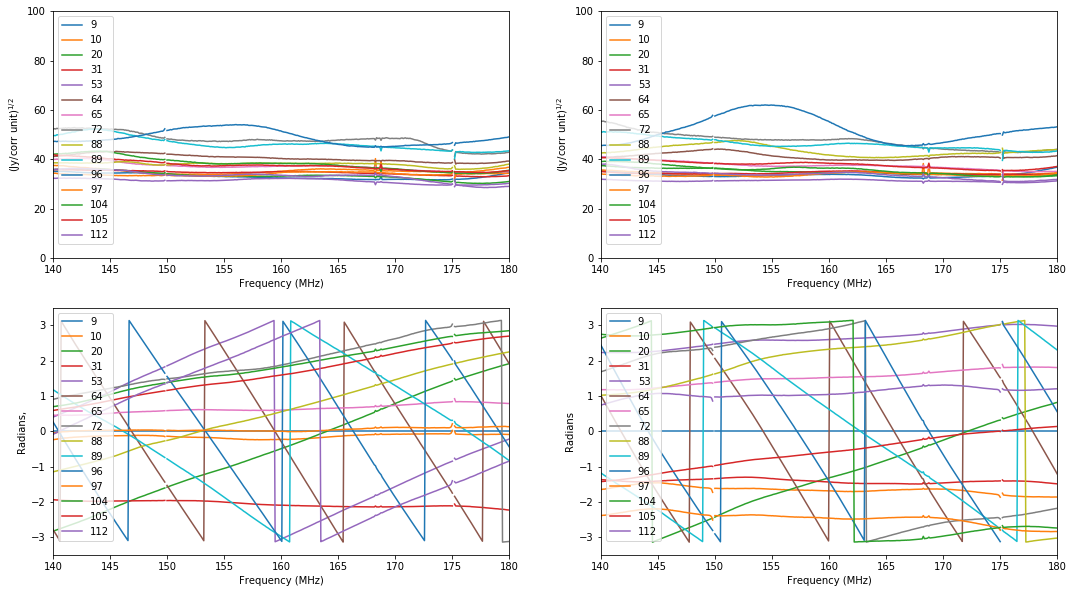

In [11]:
plot_gains(uvc, xlim=[140, 180])#, re_im = True)

In [103]:
uvc_flagged = deepcopy(uvc)
uvc_flagged.flag_array[:,:,703:705,:,:] = True
uvc_flagged.flag_array[:,:,765:772,:,:] = True
uvc_flagged.flag_array[:,:,510,:,:] = True
uvc_flagged.flag_array[:,:,698:700,:,:] = True
uvc_flagged.flag_array[:,:,832,:,:] = True
uvc_flagged.flag_array[:,:,173,:,:] = True
uvc_flagged.flag_array[:,:,376,:,:] = True
uvc_flagged.flag_array.shape

(19, 1, 1024, 56, 2)

divide by zero encountered in true_divide


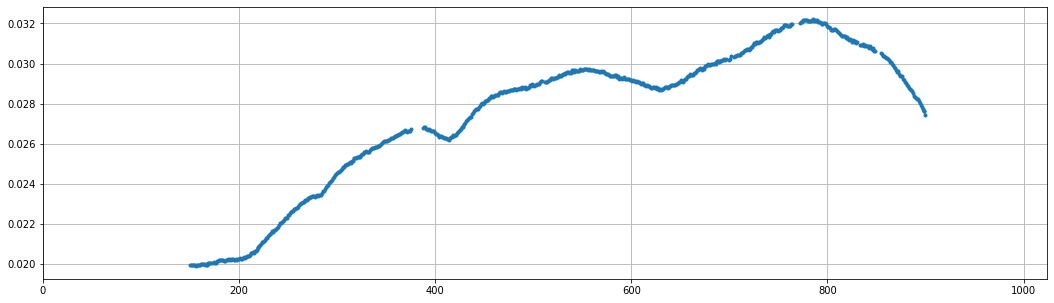

In [107]:
ant = 18
pol = 1
xlim=[0, 1024]
#xlim=[760,780]
freqs = uvc_flagged.freq_array.squeeze()
flags = ~uvc_flagged.flag_array[ant,0,:,0,pol].squeeze()
if flags.sum() != 0:    
    
    gains = uvc_flagged.gain_array[ant,0,:,0,pol].squeeze()

    plt.figure(figsize=[18,5])
    plt.plot(np.abs(gains)/flags, marker='.')
    #plt.ylim([0,0.035])
    plt.xlim(xlim)
    plt.grid()
    
else:
    print('All flagged')

divide by zero encountered in true_divide
invalid value encountered in true_divide


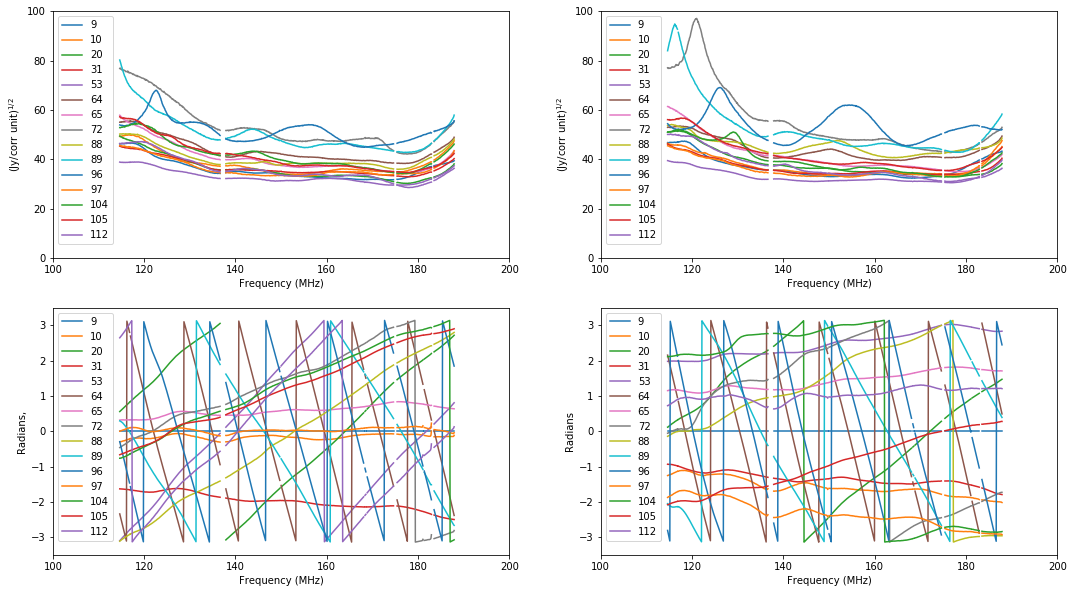

In [108]:
plot_gains(uvc_flagged)

In [109]:
uvc_flagged.write_calfits('/Users/jaguirre/Data/HERA19/zen.2457548.64714.uvcRPJ.calfits')